In [24]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [146]:
# importing te data
data=pd.read_excel('/home/kinga/python/Machine_Learning/transakcje_mieszkania.xlsx')

# 1. Data preprocessing

### 1.1. Clearing data, getting rid of unwanted data

In [147]:
data.columns

Index(['Unnamed: 0', 'index', 'Adres', 'Cena', 'Cena_lokalu', 'Cena_zł/m2',
       'Data_transakcji', 'Forma obrotu', 'Funkcja dominująca',
       'Funkcja podstawowa', 'Identyfikator', 'Ilość_izb', 'Kondygnacja',
       'Liczba i rodzaj pomieszczeń przynależnych',
       'Pomieszczenia przynależne', 'Nr zmiany', 'Numer KW',
       'Numer transakcji/wyceny', 'Obręb', 'Opis', 'Opis nieruchomości',
       'Podstawa prawna', 'Pole powierzchni pomieszczeń przynależnych',
       'powierzchnia_lokalu', 'Rodzaj nieruchomości', 'Rodzaj obciążenia',
       'Rodzaj prawa objętego transakcją', 'Rodzaj zapisu', 'repertorium',
       'Udział w prawie będący przedmiotem transakcji',
       'Uzbrojenie istniejące', 'Uzbrojenie możliwe do podłączenia',
       'Współrzędne geometryczne środka budynku', 'miasto', 'adres_miasto',
       'ulica', 'numer_mieszkania', 'wspolrzedne', 'dlugosc', 'szerokosc'],
      dtype='object')

In [148]:
# choosing columns that I'll need for further analysys
data=data[['Cena_zł/m2','Data_transakcji', 'Ilość_izb', 'Kondygnacja',
       'Pomieszczenia przynależne', 'Pole powierzchni pomieszczeń przynależnych','Obręb',
       'powierzchnia_lokalu',
       'Udział w prawie będący przedmiotem transakcji', 'miasto',
       'ulica', 'wspolrzedne', 'dlugosc', 'szerokosc', 'Opis', 'Opis nieruchomości', 'Podstawa prawna']]

In [149]:
data.head()

,Cena_zł/m2,Data_transakcji,Ilość_izb,Kondygnacja,Pomieszczenia przynależne,Pole powierzchni pomieszczeń przynależnych,Obręb,powierzchnia_lokalu,Udział w prawie będący przedmiotem transakcji,miasto,ulica,wspolrzedne,dlugosc,szerokosc,Opis,Opis nieruchomości,Podstawa prawna
358,5109.38,25.11.2015,5.0,NaN,piwnica,8.3,CHARTOWO,64.0,1/10,Poznań,ul. Bliźniąt 3,"52.3936962, 16.982495",52.393696,16.982495,NaN,NaN,Umowa (Akt notarialny)
482,5714.29,04.11.2015,3.0,8.0,piwnica,1.7,CHARTOWO,45.5,1/1,Poznań,os. Tysiąclecia 14,"52.39263235, 16.9757012886888",52.392632,16.975701,NaN,NaN,Umowa (Akt notarialny)
541,4796.88,28.10.2015,5.0,1.0,piwnica,5.2,CHARTOWO,64.0,1/1,Poznań,ul. Bliźniąt 3,"52.3936962, 16.982495",52.393696,16.982495,NaN,NaN,Umowa (Akt notarialny)
721,4960.25,05.10.2015,4.0,7.0,brak,0.0,CHARTOWO,62.9,1/1,Poznań,os. Rusa 126,"52.3892672, 16.9854845226663",52.389267,16.985485,NaN,NaN,Umowa (Akt notarialny)
742,3797.47,01.10.2015,4.0,6.0,piwnica,2.2,CHARTOWO,79.0,4/15,Poznań,os. Tysiąclecia 70,"52.39263235, 16.9757012886888",52.392632,16.975701,NaN,NaN,Umowa (Akt notarialny)


In [150]:
# some data has a description so I check what the description is
# I don't want in my data flats that are to renovation co later on I will remove them
data['Opis'].unique()

array([nan, 'do remontu', 'do kapitalnego remontu',
       'Lokal do generalnego remontu', 'Lokal do kapitalnego remontu',
       'lokal do kapitalnego remontu', 'BD, lokal do remontu',
       'do generalnego remontu',
       '136536zł stanowi wynagrodzenie spółki zbywajacej za',
       'lokal do generalnego remontu', 'lokal do remontu',
       'Lokal do remontu.'], dtype=object)

In [151]:
data['Opis nieruchomości'].unique()

array([nan, 'Lokal do kapitalnego remontu.',
       'lokal do kapitalnego remontu',
       'Lokal przeznaczony do kapitalnego remontu', 'Lokal do remontu.',
       'do remontu', 'Lokal do remontu',
       'brak możliwości dopisania ceny 333412.20', 'lokal do remontu.',
       'wartość po zakończeniu remontu 649699.00', 'Do remontu.',
       'Lokal w oficynie kamienicy.', 'cena 275418.00', 'zabytek',
       'wymaga remontu', 'do kapitalnego remontu',
       'Lokal w stanie deweloperskim', 'poddasze',
       'Lokal przeznaczony do remontu',
       'Cena 80000,00 dotyczy tylko udziału 4/12. Udział 1/12 dotyczy',
       'lokal do remontu'], dtype=object)

In [152]:
# I check whether the entire property was the subject of the purchase or just a share in the property. 
# I'm interested only in transaction marked as share '1/1'
data['Udział w prawie będący przedmiotem transakcji'].unique()

array(['1/10', '1/1', '4/15', '1/2', '9/10', '3/6', '2/12', '1/4', '1/3',
       '1/12', '/', '3/4', '1433/5000', '5/100', '1/8', '99/100',
       '120/300', '7300/21024', '1/6', '50/100', '4/12', '56/100', '6/8',
       '4/10', '2/5', '43/100', '2/10'], dtype=object)

In [153]:
# checking basis of purchase. I want't only 'Umowa (Akt notarialny)'
data['Podstawa prawna'].unique()

array(['Umowa (Akt notarialny)', 'Orzeczenie sądu, postanowienie, wyrok',
       '(n) Orzeczenie sądu (postanowienie,wyrok)',
       'Zawiadomienie z wydziału KW sądu rejonowego',
       'Akt własności ziemi', 'Inny dokument'], dtype=object)

In [154]:
# Now I select data to meet specific conditions:
# 1.remove flats which need renovation
# 2.select 'Udział w prawie będący przedmiotem transakcji' = 1/1
# 3.select 'Podstawa prawna'= 'Umowa (Akt notarialny)''
data=data.loc[(~data['Opis nieruchomości'].str.contains('remont', na=False)) &
         (~data['Opis'].str.contains('remont', na=False)) &
         (data['Podstawa prawna']=='Umowa (Akt notarialny)') &  
         (data['Udział w prawie będący przedmiotem transakcji'] =='1/1')]

In [155]:
data.describe()

,Cena_zł/m2,Ilość_izb,Kondygnacja,Pole powierzchni pomieszczeń przynależnych,powierzchnia_lokalu,dlugosc,szerokosc
count,2375.000000,2369.000000,2031.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,5200.680775,2.975939,3.023880,2.072488,52.772307,52.407843,16.928503
std,1118.296166,1.025772,2.648458,4.964128,21.275253,0.061629,0.306132
min,1572.420000,1.000000,-1.000000,0.000000,11.700000,51.675340,14.538036
25%,4490.605000,2.000000,1.000000,0.000000,38.095000,52.390093,16.894920
50%,5095.140000,3.000000,2.000000,0.000000,48.700000,52.404103,16.914878
75%,5916.780000,4.000000,4.000000,2.620000,62.195000,52.426153,16.940154
max,9288.300000,8.000000,16.000000,110.200000,246.860000,53.441572,22.309110


In [156]:
# checking on the box plot if there are outliers
import plotly.offline as pyo
import plotly.graph_objs as go

visualisation=[go.Box(y=data['Cena_zł/m2'], boxpoints='outliers', jitter=0)]

layout=go.Layout(title='Cena_zł/m2')
fig=go.Figure(data=visualisation, layout=layout)
pyo.plot(fig)

'file:///home/kinga/python/Machine_Learning/temp-plot.html'

In [157]:
# according to the box plot, there are outliers- lower fence is 2358zł/m2 and the upper fence is 8036 zł/m2
# removing outliers
data=data.loc[(data['Cena_zł/m2']>=2358) & (data['Cena_zł/m2']<=8036)]

In [158]:
data.describe()

,Cena_zł/m2,Ilość_izb,Kondygnacja,Pole powierzchni pomieszczeń przynależnych,powierzchnia_lokalu,dlugosc,szerokosc
count,2342.000000,2336.000000,2001.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,5181.333535,2.984589,3.019240,2.036789,52.784620,52.407859,16.928370
std,1057.539595,1.023377,2.662284,4.930162,21.139863,0.062056,0.308262
min,2403.320000,1.000000,-1.000000,0.000000,11.700000,51.675340,14.538036
25%,4491.192500,2.000000,1.000000,0.000000,38.100000,52.390093,16.894244
50%,5089.435000,3.000000,2.000000,0.000000,48.700000,52.404103,16.914652
75%,5896.335000,4.000000,4.000000,2.600000,62.167500,52.427278,16.940066
max,8034.030000,8.000000,16.000000,110.200000,246.860000,53.441572,22.309110


### 1.1 Taking care of missing data

In [162]:
from sklearn.preprocessing import Imputer

In [166]:
# there are missing values in column 'Kondygnacja'. I will replace NaN with mean value from this column
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer=imputer.fit(data[['Kondygnacja']]) # 
data.iloc[:,3:4]=imputer.transform(data.iloc[:,3:4]) 


In [168]:
# saving file with data
data.to_csv('/home/kinga/python/Machine_Learning/cleared_data(flats).csv')

### Encoding categorical values

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [52]:
labelencoder_X=LabelEncoder() # object of class LabelEncoder
X.iloc[:,0]=labelencoder_X.fit_transform(X.iloc[:, 0]) #returns first column of X encoded- 
#it means that if I select first columns I will not have countries' names but numbers 
# there is a problem with this method, because ML equation will compare those values and this is not true that 
# if France has number 0, it is lower that Spain with number 2
# To prevent from this, we are going to use OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0]) #categorical_features=0 -nummber of columns with categorical val
X=onehotencoder.fit_transform(X).toarray() # we don't have to put column number because we specified it above

/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [56]:
# enoding prediction target y
labelencoder_y=LabelEncoder() # object of class LabelEncoder
y=labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Features scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train) # fit the object to training set and then transform it
X_test=sc_X.transform(X_test) #we don't need to to fit it 

In [71]:
y_test

array([0, 0])

In [74]:
features=pd.DataFrame(X_train)

In [75]:
features

,0,1,2,3,4
0,-1.0,2.645751,-0.774597,0.263068,0.123815
1,1.0,-0.377964,-0.774597,-0.253501,0.461756
2,-1.0,-0.377964,1.290994,-1.975398,-1.530933
3,-1.0,-0.377964,1.290994,0.052614,-1.111420
4,1.0,-0.377964,-0.774597,1.640585,1.720297
5,-1.0,-0.377964,1.290994,-0.081312,-0.167514
6,1.0,-0.377964,-0.774597,0.951826,0.986148
7,1.0,-0.377964,-0.774597,-0.597881,-0.482149


# 2. Simple Linear Regression
- in this exercise I will predict apartment's prices depending od their surface

In [305]:
data=pd.read_csv('/home/kinga/python/Machine_Learning/cleared_data(flats).csv')

In [306]:
data.head(3)

,Unnamed: 0,Cena_zł/m2,Data_transakcji,Ilość_izb,Kondygnacja,Pomieszczenia przynależne,Pole powierzchni pomieszczeń przynależnych,Obręb,powierzchnia_lokalu,Udział w prawie będący przedmiotem transakcji,miasto,ulica,wspolrzedne,dlugosc,szerokosc,Opis,Opis nieruchomości,Podstawa prawna
0,482,5714.29,04.11.2015,3.0,8.0,piwnica,1.7,CHARTOWO,45.5,1/1,Poznań,os. Tysiąclecia 14,"52.39263235, 16.9757012886888",52.392632,16.975701,NaN,NaN,Umowa (Akt notarialny)
1,541,4796.88,28.10.2015,5.0,1.0,piwnica,5.2,CHARTOWO,64.0,1/1,Poznań,ul. Bliźniąt 3,"52.3936962, 16.982495",52.393696,16.982495,NaN,NaN,Umowa (Akt notarialny)
2,721,4960.25,05.10.2015,4.0,7.0,brak,0.0,CHARTOWO,62.9,1/1,Poznań,os. Rusa 126,"52.3892672, 16.9854845226663",52.389267,16.985485,NaN,NaN,Umowa (Akt notarialny)


In [307]:
#checking the index number of column 'Cena_zł/m2'
data.columns.tolist().index('Cena_zł/m2')

1

In [308]:
#checking the index number of column 'Cena_zł/m2'
data.columns.tolist().index('powierzchnia_lokalu')

8

In [309]:
#features
X=data.iloc[:,8]

#target 
y=data.iloc[:,1]

In [312]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = X_train.values.reshape(-1,1)


In [318]:
# in linear regression we don't need to take care of data scaling. This model will do it for us

In [319]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [320]:
# predicting the test set results
X_test= X_test.values.reshape(-1,1)
y_pred_simple_lin_reg=regressor.predict(X_test) 

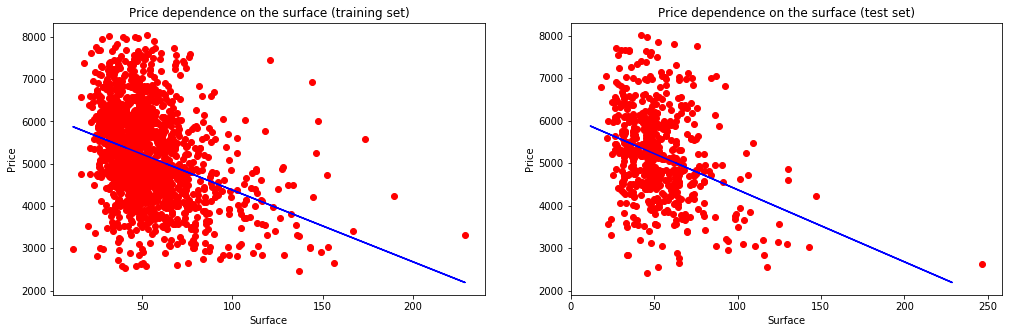

In [321]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.2) # space between plots

# visualising the training test results
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price dependence on the surface (training set)')
plt.xlabel('Surface')
plt.ylabel('Price')

# visualising the test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # trend line is the same as above because I want to see
#how far are predicted values from trend line
plt.title('Price dependence on the surface (test set)')
plt.xlabel('Surface')
plt.ylabel('Price')


plt.show()

In [322]:
# The above graphs show that there is a correlation between surface and price (the higher surface, the lower price), 
# but there are also other factors that infulence the price for egg. location, standard etc. That's why predictions 
# are not very accurate

# 3. Multiple Linear Regression
- in this exercise I will predict prices of apartments using Multiple Linear Regression

In [1]:
import pandas as pd 
data=pd.read_csv('/home/kinga/python/Machine_Learning/cleared_data(flats).csv')

In [2]:
data.columns

Index(['Unnamed: 0', 'Cena_zł/m2', 'Data_transakcji', 'Ilość_izb',
       'Kondygnacja', 'Pomieszczenia przynależne',
       'Pole powierzchni pomieszczeń przynależnych', 'Obręb',
       'powierzchnia_lokalu', 'Udział w prawie będący przedmiotem transakcji',
       'miasto', 'ulica', 'wspolrzedne', 'dlugosc', 'szerokosc', 'Opis',
       'Opis nieruchomości', 'Podstawa prawna'],
      dtype='object')

In [325]:
# Features
X=data[['Obręb','powierzchnia_lokalu', 'Kondygnacja']]
# Predicting target
y=data['Cena_zł/m2']

In [326]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X=LabelEncoder()# object of class LabelEncoder
X.iloc[:,0]=labelencoder_X.fit_transform(X.iloc[:,0]) #returns first column of X encoded- 
#it means that if I select first columns I will not have districts' names but numbers 
# there is a problem with this method, because ML equation will compare those values 
# To prevent from this, we are going to use OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0]) #making Dummy Variables to column 'Obręb'
X=onehotencoder.fit_transform(X).toarray() # don't have to put column number because they were specified above

/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Predicting prices with Backward Elimination

In [327]:
# Backward elimination
import statsmodels.formula.api as sm
# appending a column with constant value
X=np.append(arr=np.ones((2342, 1)).astype(int), values=X, axis=1) # 2342 rows, 1 column

In [328]:
# atomatic Bacward Elimination ()
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    """
    authors: Kirill Eremenko, Hadelin de Ponteves
    """
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = float(max(regressor_OLS.pvalues))
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [329]:
SL = 0.05
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]] 
X_Modeled = backwardElimination(X_opt, SL)

In [330]:
# predicting prices after  Backward Elimination
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_Modeled, y,random_state=0 )

# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set
# pricies predicted using Multiple Linear Regression with Backward Elimintion
y_pred_multiple_BE=regressor.predict(X_test)

#### Predicting prices without Backward Elimination

In [331]:
# predicting prices without Backward Elimination
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=0 )

# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set
# pricies predicted using Multiple Linear Regression without Backward Elimintion
y_pred_multiple_without_BE=regressor.predict(X_test)

In [332]:
len(y_pred_multiple_without_BE)

586

#### Comparison of results obtained

In [345]:
# prices obtained with Simple Linear Regression
prices_simple_lin_reg=pd.Series(y_pred_simple_lin_reg, name='Simple Lin.Reg')

# prices obtained with  Backward Elimination (Multiple Linear Regression)
prices_BE=pd.Series(y_pred_multiple_BE, name='Multiple Lin.Reg. with BE')
# prices obtained without Backward Elimination ((Multiple Linear Regression))
prices_without_BE=pd.Series(y_pred_multiple_without_BE, name='Multiple Lin.Reg. without BE' )

real_prices=y_test.reset_index(drop=True).rename('Real prices')

real_vs_predicted_simple=abs(round(100-prices_simple_lin_reg*100/real_prices,2)).rename('real vs predicted simple %')
real_vs_predicted_BE=abs(round(100-prices_BE*100/real_prices,2)).rename('real vs predicted multiple BE %')
real_vs_predicted_without_BE=abs(round(100-prices_without_BE*100/real_prices,2)).rename('real vs predicted multiple wthout BE %')

In [346]:
comparison=pd.concat([real_prices, prices_simple_lin_reg, real_vs_predicted_simple,
                      prices_BE, real_vs_predicted_BE, prices_without_BE, 
                      real_vs_predicted_without_BE], axis=1 )
comparison.head()

,Real prices,Simple Lin.Reg,real vs predicted simple %,Multiple Lin.Reg. with BE,real vs predicted multiple BE %,Multiple Lin.Reg. without BE,real vs predicted multiple wthout BE %
0,4362.42,5567.040277,27.61,5398.728288,23.76,5459.573043,25.15
1,4725.57,5494.575884,16.27,5283.139799,11.80,5193.004225,9.89
2,4752.85,5180.110962,8.99,5081.568926,6.92,5212.127062,9.66
3,4893.48,4770.780476,2.51,5120.698147,4.64,5116.795930,4.56
4,6207.63,5271.752116,15.08,5135.170367,17.28,5229.628135,15.75


In [347]:
comparison.describe()

,Real prices,Simple Lin.Reg,real vs predicted simple %,Multiple Lin.Reg. with BE,real vs predicted multiple BE %,Multiple Lin.Reg. without BE,real vs predicted multiple wthout BE %
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,5192.981945,5175.574082,16.313669,5189.471145,14.671126,5192.833889,14.728072
std,1071.161724,357.117021,15.078147,537.655801,14.322853,542.664880,14.328826
min,2403.320000,1883.405315,0.070000,1896.984396,0.030000,1908.003604,0.060000
25%,4523.975000,5005.313947,6.195000,4964.031703,5.250000,4971.574280,5.335000
50%,5126.245000,5242.902123,12.630000,5224.751799,11.615000,5245.608358,11.255000
75%,5933.110000,5426.184430,22.175000,5445.005074,19.075000,5451.204050,19.040000
max,8008.540000,5765.256698,120.360000,7326.171939,118.110000,7323.494847,113.940000


In [348]:
# Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
print('Mean absolute error Simple Linear Regression is:', mean_absolute_error(y_test,y_pred_simple_lin_reg))
print('Mean absolute error with Backward Elimination is:', mean_absolute_error(y_test, y_pred_multiple_BE))
print('Mean absolute error without Backward Elimination is:', mean_absolute_error(y_test, y_pred_multiple_without_BE))

Mean absolute error Simple Linear Regression is: 795.2494382406835
Mean absolute error with Backward Elimination is: 710.1172577494393
Mean absolute error without Backward Elimination is: 712.0097527107214


#### Conclusions
The results show that there is no significant difference between prices obtained using multiple linear regression
with backward elimination and without it. Multiple linear regression gives a bit better results than 
simple linear regression. Some of predicted prices are quite accurate but some of them are far away from real prices.
It means that models need to be improved - I hope that later on I find out how to do it. 

# 4. Polynomial Regression (non linear) vs Simple Linear Regression
- in this exercise I will compare prices of apartments obtained using Simple Linear Regression and Polynomial Regression

In [38]:
data=pd.read_csv('/home/kinga/python/Machine_Learning/cleared_data(flats).csv')

In [39]:
#features
X=data.iloc[:,8]

#target 
y=data.iloc[:,1]

In [ ]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = X_train.values.reshape(-1,1)

In [42]:
# Simple Linear Regression
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set results
X_test= X_test.values.reshape(-1,1)
y_pred_simple_lin_reg=regressor.predict(X_test)

In [92]:
# Polynomial Regression
# fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)# I've checked also different degrees but 2 is the most accurate
X_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, y_train)

# predicting the test set results
y_pred_polynomial=lin_reg2.predict(poly_reg.fit_transform(X_test))

In [93]:
# Comparing the results

# prices obtained with Simple Linear Regression
prices_simple_lin_reg=pd.Series(y_pred_simple_lin_reg, name='Simple Lin.Reg')

# prices obtained with Polynomial Regression
prices_polynomial=pd.Series(y_pred_polynomial, name='Poynomial Reg.')

# real prices
real_prices=y_test.reset_index(drop=True).rename('Real prices')

real_vs_predicted_simple=abs(round(100-prices_simple_lin_reg*100/real_prices,2)).rename('real vs predicted simple %')
real_vs_predicted_polynomial=abs(round(100-prices_polynomial*100/real_prices,2)).rename('real vs predicted polynomial %')

In [94]:
comparison1=pd.concat([real_prices, prices_simple_lin_reg, real_vs_predicted_simple,
                      prices_polynomial, real_vs_predicted_polynomial], axis=1 )
comparison1.describe()

,Real prices,Simple Lin.Reg,real vs predicted simple %,Poynomial Reg.,real vs predicted polynomial %
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,5192.981945,5175.574082,16.313669,5174.742728,16.301331
std,1071.161724,357.117021,15.078147,361.019537,15.240149
min,2403.320000,1883.405315,0.070000,3905.419730,0.020000
25%,4523.975000,5005.313947,6.195000,4945.665595,5.932500
50%,5126.245000,5242.902123,12.630000,5222.884351,12.370000
75%,5933.110000,5426.184430,22.175000,5456.991519,22.027500
max,8008.540000,5765.256698,120.360000,5936.591773,120.070000


In [95]:
# Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
print('Mean absolute error Simple Linear Regression is:', mean_absolute_error(y_test,y_pred_simple_lin_reg))
print('Mean absolute error with Polynomian Regression is:', mean_absolute_error(y_test, y_pred_polynomial))

Mean absolute error Simple Linear Regression is: 795.2494382406835
Mean absolute error with Polynomian Regression is: 794.2763890445392


#### Conclusion
As we can see above, there is no significant difference between results obtained with polynomial regression and simple linear regression

# 4. Decision tree (non linear and non continous regression model)
- in this exercise I will compare prices of apartments obtained using Decision Tree Model

In [121]:
data=pd.read_csv('/home/kinga/python/Machine_Learning/cleared_data(flats).csv')

In [122]:
data.columns

Index(['Unnamed: 0', 'Cena_zł/m2', 'Data_transakcji', 'Ilość_izb',
       'Kondygnacja', 'Pomieszczenia przynależne',
       'Pole powierzchni pomieszczeń przynależnych', 'Obręb',
       'powierzchnia_lokalu', 'Udział w prawie będący przedmiotem transakcji',
       'miasto', 'ulica', 'wspolrzedne', 'dlugosc', 'szerokosc', 'Opis',
       'Opis nieruchomości', 'Podstawa prawna'],
      dtype='object')

In [123]:
# independent variables
X=data[['Kondygnacja', 'Pole powierzchni pomieszczeń przynależnych', 'powierzchnia_lokalu', 'dlugosc', 'szerokosc']]
# dependent variable
y=data.iloc[:,1]

In [124]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    """
    function to get Mean Absolute Error for different max_leaf_nodes
    https://www.kaggle.com/learn/intro-to-machine-learning
    """
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return(mae)

In [126]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [10, 20,30, 50,70, 100, 200, 300, 400]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  796
Max leaf nodes: 20  		 Mean Absolute Error:  767
Max leaf nodes: 30  		 Mean Absolute Error:  745
Max leaf nodes: 50  		 Mean Absolute Error:  747
Max leaf nodes: 70  		 Mean Absolute Error:  759
Max leaf nodes: 100  		 Mean Absolute Error:  771
Max leaf nodes: 200  		 Mean Absolute Error:  788
Max leaf nodes: 300  		 Mean Absolute Error:  835
Max leaf nodes: 400  		 Mean Absolute Error:  839


In [127]:
# as we can see above, the hihgest accuracy will be with max leaf nodes =30
regressor=DecisionTreeRegressor(max_leaf_nodes=30, random_state=0)
regressor.fit(X_train, y_train)

# predicting prices
y_pred_decision_tree=regressor.predict(X_test)

print(mean_absolute_error(y_test, y_pred_decision_tree))

745.6082182689391


# 5. Random Forest (non linear and non continous regression model)
- in this exercise I will compare prices of apartments obtained using Random Forest Model

In [142]:
data=pd.read_csv('/home/kinga/python/Machine_Learning/cleared_data(flats).csv')

In [143]:
data.columns

Index(['Unnamed: 0', 'Cena_zł/m2', 'Data_transakcji', 'Ilość_izb',
       'Kondygnacja', 'Pomieszczenia przynależne',
       'Pole powierzchni pomieszczeń przynależnych', 'Obręb',
       'powierzchnia_lokalu', 'Udział w prawie będący przedmiotem transakcji',
       'miasto', 'ulica', 'wspolrzedne', 'dlugosc', 'szerokosc', 'Opis',
       'Opis nieruchomości', 'Podstawa prawna'],
      dtype='object')

In [144]:
# independent variables
X=data[['Kondygnacja', 'Pole powierzchni pomieszczeń przynależnych', 'powierzchnia_lokalu', 'dlugosc', 'szerokosc']]
# dependent variable
y=data.iloc[:,1]

In [145]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def get_mae1(n_estimators, X_train, X_test, y_train, y_test):
    model1 = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model1.fit(X_train, y_train) 
    y_pred1=model1.predict(X_test)
    mae1 = mean_absolute_error(y_test, y_pred1)
    return(mae1)

In [150]:
# compare MAE with differing values of max_leaf_nodes
for n_estimators in [10, 50,70,100,120, 150, 200, 300, 400]:
    my_mae1 = get_mae1(n_estimators, X_train, X_test, y_train, y_test)
    
    print("n_estimators: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, my_mae1))

n_estimators: 10  		 Mean Absolute Error:  688
n_estimators: 50  		 Mean Absolute Error:  653
n_estimators: 70  		 Mean Absolute Error:  651
n_estimators: 100  		 Mean Absolute Error:  652
n_estimators: 120  		 Mean Absolute Error:  652
n_estimators: 150  		 Mean Absolute Error:  652
n_estimators: 200  		 Mean Absolute Error:  652
n_estimators: 300  		 Mean Absolute Error:  652
n_estimators: 400  		 Mean Absolute Error:  653


In [156]:
# as we can see above, the hihgest accuracy will be with n_estimators =70
regressor=RandomForestRegressor(n_estimators=70, random_state=0)
regressor.fit(X_train, y_train)

# predicting prices
y_pred_random_forest=regressor.predict(X_test)
print(mean_absolute_error(y_test, y_pred_random_forest))

651.9515991055466


#### Comparing the results of Decision Tree and Random Forest Model

In [158]:
# prices obtained with Decision Tree
prices_decision_tree=pd.Series(y_pred_decision_tree, name='Decision Tree')

# prices obtained with Random Forest
prices_random_forest=pd.Series(y_pred_random_forest, name='Random Forest')

#real prices
real_prices=y_test.reset_index(drop=True).rename('Real prices')

real_vs_decision_tree=abs(round(100-prices_decision_tree*100/real_prices,2)).rename('Real vs Decision Tree %')
real_vs_random_forest=abs(round(100-y_pred_random_forest*100/real_prices,2)).rename('Real vs Random Forest %')

In [159]:
comparison2=pd.concat([real_prices, prices_decision_tree, real_vs_decision_tree,
                      prices_random_forest, real_vs_random_forest], axis=1 )
comparison2.describe()

,Real prices,Decision Tree,Real vs Decision Tree %,Random Forest,Real vs Random Forest %
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,5192.981945,5173.276074,19.981263,5181.762179,13.490392
std,1071.161724,659.737913,18.491549,652.839311,14.113830
min,2403.320000,3581.218571,0.070000,3250.781857,0.010000
25%,4523.975000,4816.794048,7.072500,4776.348509,4.332500
50%,5126.245000,5143.755234,15.195000,5176.180250,9.160000
75%,5933.110000,5512.491546,26.237500,5581.959464,18.050000
max,8008.540000,7275.651667,150.090000,7142.383857,105.660000


In [160]:
comparison2.head()

,Real prices,Decision Tree,Real vs Decision Tree %,Random Forest,Real vs Random Forest %
0,4362.42,4816.794048,10.42,5338.216810,22.37
1,4725.57,7275.651667,53.96,5118.988571,8.33
2,4752.85,4493.118714,5.46,4646.695286,2.23
3,4893.48,5023.512286,2.66,4952.273286,1.20
4,6207.63,5023.512286,19.08,5400.179714,13.01
